# Outline for Monday, April 12
## Web 3 - BeautifulSoup

You will be able to:
 - Describe 3 things a DOM element may contain & provide examples
 - Create BeautifulSoup objects from an HTML string
     - And display them with `prettify()`
 - Find elements by their tag using `find()` and `find_all()`
 - Inspect BeautifulSoup elements to determine the contents of a web page
     - Using `get_text()`, `children`, and `attrs`
 - Use BeautifulSoup to scrape a live website
 
Vocabulary:
 - DOM

Useful modules:
 - BeautifulSoup (pip install beautifulsoup4)

In [2]:
import requests                #For downloading the HTML content using HTTP GET request
from bs4 import BeautifulSoup  #For parsing the HTML content and searching through the HTML
import os
import pandas as pd

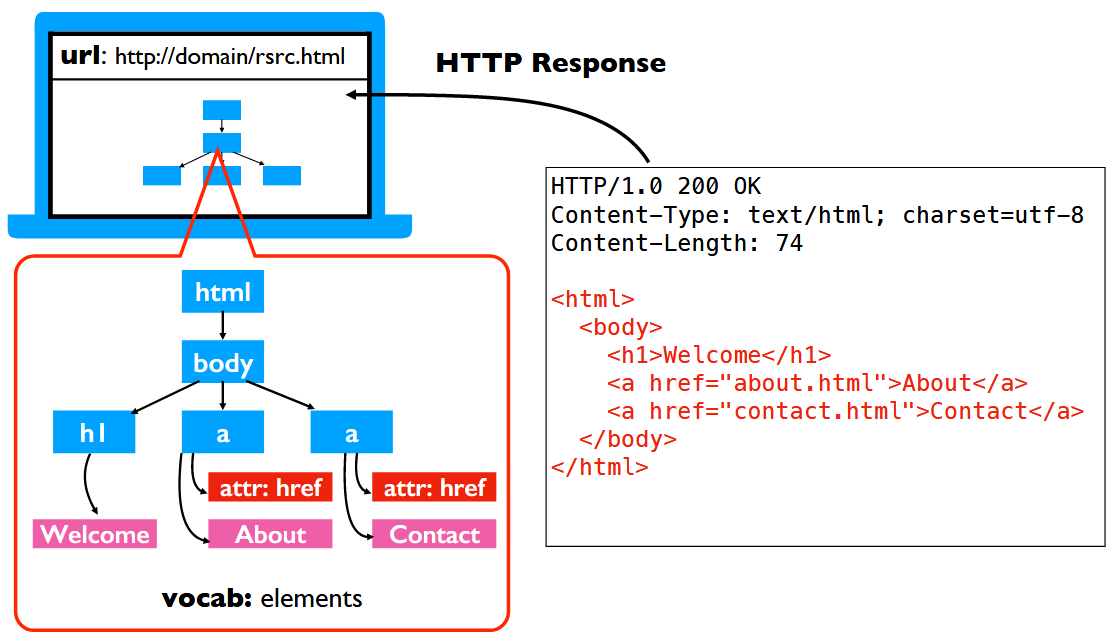

## DOM tree
Document Object Model

Recall HTML tag pairs are **elements**

Elements may contain:
 - text
 - attribute
 - other element
 


## BeautifulSoup

A module we use for parsing HTML text
And for handling the DOM form data that we get

In [3]:
html = "<b>Items</b><ul><li>x</li><li><b>y</b></li><li>z</li></ul>"
doc = BeautifulSoup(html, "html.parser")

In [5]:
print(doc)
print(doc.prettify())

<b>Items</b><ul><li>x</li><li><b>y</b></li><li>z</li></ul>
<b>
 Items
</b>
<ul>
 <li>
  x
 </li>
 <li>
  <b>
   y
  </b>
 </li>
 <li>
  z
 </li>
</ul>


In [6]:
elements = doc.find_all("li")
print(elements)

[<li>x</li>, <li><b>y</b></li>, <li>z</li>]


In [7]:
for e in elements:
    print(e.get_text())

x
y
z


In [9]:
one_element = doc.find("li")
print(one_element)
print(type(one_element))
print(one_element.get_text())

<li>x</li>
<class 'bs4.element.Tag'>
x


Inspecting a single element

In [10]:
html2 = "<a href=\"schedule.html\"><i>please</i> click <b>here</b></a>"
doc2 = BeautifulSoup(html2, "html.parser")

In [11]:
link = doc2.find("a")

In [12]:
list(link.children)

[<i>please</i>, ' click ', <b>here</b>]

In [14]:
link.get_text()

'please click here'

In [13]:
link.attrs

{'href': 'schedule.html'}

# Exercise STAGE 1: extract all state URLs from the states page
## Stage 1 pseudocode
1. Use requests module to send a GET request to https://simple.wikipedia.org/wiki/List_of_U.S._states
2. Don't forget to raise_for_status to ensure you are getting 200 OK status code
3. Explore what r.text gives you

In [15]:
url = "https://simple.wikipedia.org/wiki/List_of_U.S._states"
r = requests.get(url)
r.raise_for_status()

## Stage 1 pseudocode continued...
4. Check out what type you are getting from r.text

In [16]:
type(r.text)

str

## Stage 1 pseudocode continued...
5. Create BeautifulSoup object by passing r.text, "html.parser" as arguments and capture return value into a variable called doc
6. Try prettify() method call --- still not that pretty, right?

In [17]:
doc = BeautifulSoup(r.text, "html.parser")
print(doc.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of U.S. states - Simple English Wikipedia, the free encyclopedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"ed886aaf-f84a-4da0-a0d2-2ed03008e0df","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_U.S._states","wgTitle":"List of U.S. states","wgCurRevisionId":7450620,"wgRevisionId":7450620,"wgArticleId":3023,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["States of the United States","Lists about U.S. states"],"wgPageContentLanguage":"en","wgPageContentMod

## Stage 1 pseudocode continued...
7. (Not a code step) Open "https://simple.wikipedia.org/wiki/List_of_U.S._states" on Google Chrome.
    - Right click on one of the state pages
    - Click on "Inspect" --- this opens developer tools
    - This tool let's you explore the html source code
    - Explore the \<table\> and sub tags like \<th\>, \<tr\>, \<td\>
    - Let's go back to coding

## Stage 1 pseudocode continued...
7. Find all "table" elements in the document by using doc.find_all(...) function and capture return value into a variable "tables"
    - explore the length of the value returned from find_all(...) function
    - check out the type of the value returned from find_all(...) function
8. Add an assert to check that there is only one table - futuristic assert to make sure the html format hasn't changed on the website
9. Extract the first table into tbl variable
    - explore type of tbl
    - try printing the content of tb1 --- looks like just a string

In [19]:
tables = doc.find_all("table")
print("Length:",len(tables))
print("Type:",type(tables))
assert len(tables)==1

Length: 1
Type: <class 'bs4.element.ResultSet'>


In [22]:
tbl = tables[0]
print(type(tbl))
print(tbl.prettify())

<class 'bs4.element.Tag'>
<table class="wikitable sortable plainrowheaders" style="text-align: center;">
 <caption>
  States of the United States of America
 </caption>
 <tbody>
  <tr>
   <th colspan="2" rowspan="2" scope="col">
    Name &amp;
    <br/>
    <a class="mw-redirect" href="/wiki/List_of_U.S._state_abbreviations" title="List of U.S. state abbreviations">
     postal abbs.
    </a>
    <p>
     <sup class="reference" id="cite_ref-USPSabbreviations_1-0">
      <a href="#cite_note-USPSabbreviations-1">
       [1]
      </a>
     </sup>
    </p>
   </th>
   <th>
   </th>
   <th colspan="2" scope="col">
    Cities
   </th>
   <th rowspan="2" scope="col">
    Established
    <sup class="reference" id="cite_ref-3">
     <a href="#cite_note-3">
      [upper-alpha 1]
     </a>
    </sup>
   </th>
   <th rowspan="2" scope="col">
    Population
    <br/>
    <sup class="reference" id="cite_ref-4">
     <a href="#cite_note-4">
      [upper-alpha 2]
     </a>
    </sup>
    <sup class="

## Stage 1 pseudocode continued...
10. Find all the tr elements by using tbl.find_all(...) function and capture return value into a variable tr.
    - explore length of trs, type of trs
    - Add an assert checking that length of trs is at least 50 (For 50 US states)

In [23]:
trs = tbl.find_all("tr")
print("Length:",len(trs))
assert len(trs)>=50

Length: 52


## Stage 1 pseudocode continued...
11. Iterate over each item in trs (going to be a lengthy step!)
    - print each item (tr tag)
    - call tr.find(..) to find "th" elements --- this finds th element for every tr element.
    - capture return value into a variable called th
    - print th and explore what you are getting.
    - find each hyperlinks within each th element: call th.find_all("a") and capture return value into a variable called links
    - explore length of links by printing it --- some of the states have 2 links; go back and explore why that is the case and figure out which link you want
        - some have 0 links, skip over those entries!
        - extract first of the hyperlinks into a variable called link
        - print link to confirm you are able to extract the correct link
        - explore type of link
        - print link.get_text() method and get attrs of link by saying link.attrs
        - capture link.get_text() into a variable state
        - capture link.attrs into a variable state_url --- we need a full URL. Define a prefix variable holding "https://simple.wikipedia.org" and concatenate prefix + link.attrs
        - create a new dictionary called state_links --- we are going to use this dict to track each state and its URL. Think carefully about where you have to create this empty dict.

#### Congrats :) stage 1 is done

In [29]:
state_links = {} #KEY - name of the state, VALUE - link
prefix = "https://simple.wikipedia.org"

for row in trs:
    th = row.find("th")
    links = th.find_all("a")
    #print(th.get_text())
    #print(len(links))
    if len(links) == 0:
        continue
    link = links[0]
    #print(link)
    #print(type(link))
    state = link.get_text()
    state_url = prefix + link.attrs["href"]
    state_links[state] = state_url
    
state_links
    

{'postal abbs.': 'https://simple.wikipedia.org/wiki/List_of_U.S._state_abbreviations',
 'Alabama': 'https://simple.wikipedia.org/wiki/Alabama',
 'Alaska': 'https://simple.wikipedia.org/wiki/Alaska',
 'Arizona': 'https://simple.wikipedia.org/wiki/Arizona',
 'Arkansas': 'https://simple.wikipedia.org/wiki/Arkansas',
 'California': 'https://simple.wikipedia.org/wiki/California',
 'Colorado': 'https://simple.wikipedia.org/wiki/Colorado',
 'Connecticut': 'https://simple.wikipedia.org/wiki/Connecticut',
 'Delaware': 'https://simple.wikipedia.org/wiki/Delaware',
 'Florida': 'https://simple.wikipedia.org/wiki/Florida',
 'Georgia': 'https://simple.wikipedia.org/wiki/Georgia_(U.S._state)',
 'Hawaii': 'https://simple.wikipedia.org/wiki/Hawaii',
 'Idaho': 'https://simple.wikipedia.org/wiki/Idaho',
 'Illinois': 'https://simple.wikipedia.org/wiki/Illinois',
 'Indiana': 'https://simple.wikipedia.org/wiki/Indiana',
 'Iowa': 'https://simple.wikipedia.org/wiki/Iowa',
 'Kansas': 'https://simple.wikipedia.

# STAGE 2: download the html page for each state
## Stage 2 pseudocode
1. Create a directory called "html_files_for_states". Make sure to use try except block to catch FileExistsError exception
2. Initially convert the keys of state_links dict into a list and work with just first 3 items in the list of keys
3. Iterate over each key (initially just use 3):
    1. If key is "postal abbs.", skip processing. What keyword allows you to skip current iteration of the loop?
    2. To create each state's html file name, concatenate the directory name "html_files_for_states" with current key and add a ".html" to the end.
    3. Add the html file name into a new dictionary called "state_files". Think carefully about where you have to create this empty dict.
    4. Use requests module get(...) function call to download the contents of the state URL page.
    5. Open the state html file in write mode and write r.text into the state html file.
    
#### Congrats :) stage 2 is done

In [30]:
html_dir = "html_files_for_states"
state_filenames = {} #KEY: state; VALUE: state file

try:
    os.mkdir(html_dir)
except FileExistsError:
    pass

for state in state_links:
    if state == "postal abbs.":
        continue
    state_url = state_links[state]
    
    state_filename = os.path.join(html_dir, state + ".html")
    state_filenames[state] = state_filename
    
    #Optimization to respect wikipedia
    if os.path.exists(state_filename):
        continue
        
    #Download
    r = requests.get(state_url)
    r.raise_for_status
    
    #Save to a file
    f = open(state_filename, "w", encoding="utf-8")
    f.write(r.text)
    f.close()

# STAGE 3: extract details from each state page
## Stage 3 pseudocode
1. Write a function state_stats. Input path to 1 state file. Output dict of stats for that state
2. Open state html file, read its content.
3. Create a BeautifulSoup object called doc.
4. doc.find_all("tr") - capture return value into a variable called trs
5. Iterate over each tr element
    1. You can retrieve a pair of elements by saying: cells = tr.find_all(["th", "td"])
    2. Explore length of the cells. Notice that there are some entries have length > 2. Let's skip over those. 
    3. Create a dict called stats, where key is the th element's text and the value is td element's text
6. Don't forget to return the stats dict
7. Call state_stats with state_files["Wisconsin"]

In [34]:
def state_stats(path):
    stats = {}
    f = open(path, encoding="utf-8")
    html = f.read()
    f.close()
    
    doc = BeautifulSoup(html, "html.parser")
    trs = doc.find_all("tr")
    for tf in trs:
        cells = tf.find_all(["th","td"])
        if len(cells) == 2:
            key = cells[0].get_text()
            value = cells[1].get_text()
            stats[key] = value
    return stats

wi_stats = state_stats(state_filenames["Wisconsin"])
wi_stats

{'Country': 'United States',
 'Before statehood': 'Wisconsin Territory',
 'Admitted to the Union': 'May 29, 1848 (30th)',
 'Capital': 'Madison',
 'Largest city': 'Milwaukee',
 'Largest metro': 'Chicago metropolitan area',
 '\xa0•\xa0Governor': 'Tony Evers (D)',
 '\xa0•\xa0Lieutenant Governor': 'Mandela Barnes (D)',
 'Legislature': 'Wisconsin Legislature',
 '\xa0•\xa0Upper house': 'Senate',
 '\xa0•\xa0Lower house': 'Assembly',
 'U.S. senators': 'Ron Johnson (R)Tammy Baldwin (D)',
 'U.S. House delegation': '5 Republicans3 Democrats (list)',
 '\xa0•\xa0Total': '5,822,434',
 '\xa0•\xa0Land': '54,310\xa0sq\xa0mi (140,663\xa0km2)',
 'Area rank': '23rd',
 '\xa0•\xa0Length': '311\xa0mi (507\xa0km)',
 '\xa0•\xa0Width': '260\xa0mi (427\xa0km)',
 'Elevation': '1,050\xa0ft (320\xa0m)',
 'Highest\xa0elevation (Timms Hill[6][7])': '1,951\xa0ft (595\xa0m)',
 'Lowest\xa0elevation (Lake Michigan[6][7])': '579\xa0ft (176\xa0m)',
 '\xa0•\xa0Rank': '20th',
 '\xa0•\xa0Density': '105/sq\xa0mi (40.6/km2)',
 

## Stage 3 pseudocode continued
- Iterate over all the state files, call state_stats function, and save the return value into a variable.
- Keep track of each state's stats in a dict called state_details
- Create a pandas DataFrame from the state_details dict
- Explore the DataFrame.

In [45]:
state_details = {}

for state in state_filenames:
    stats = state_stats(state_filenames[state])
    state_details[state] = stats

In [47]:
df = pd.DataFrame(state_details).transpose()
df

,Country,Before statehood,Admitted to the Union,Capital,Largest city,Largest metro,• Governor,• Lieutenant Governor,Legislature,• Upper house,...,Highest elevation (Mount Rainier),Lowest elevation (Pacific Ocean),Highest elevation (Spruce Knob[1][2][3]),Lowest elevation (Potomac River at Virginia border[2][3]),Highest elevation (Timms Hill[6][7]),Lowest elevation (Lake Michigan[6][7]),East North Central,West North Central,Highest elevation (Gannett Peak[2][3][4]),Lowest elevation (Belle Fourche River at South Dakota border[3][4])
Alabama,United States,Alabama Territory,"December 14, 1819 (22nd)",Montgomery,Birmingham,Greater Birmingham,Kay Ivey (R),Will Ainsworth (R),Alabama Legislature,Senate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,United States,Territory of Alaska,"January 3, 1959 (49th)",Juneau,Anchorage,NaN,Mike Dunleavy (R),Kevin Meyer (R),Alaska Legislature,Senate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,United States,Arizona Territory,"February 14, 1912 (48th)",NaN,NaN,Greater Phoenix,Doug Ducey (R),NaN,Arizona Legislature,Senate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,United States,Arkansas Territory,"June 15, 1836 (25th)",NaN,NaN,Central Arkansas,Asa Hutchinson (R),Tim Griffin (R),Arkansas General Assembly,Senate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,United States,California Republic,"September 9, 1850 (31st)",Sacramento,Los Angeles,Greater Los Angeles,Gavin Newsom (D),Eleni Kounalakis (D),State Legislature,State Senate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,United States,NaN,"August 1, 1876 (38th)",NaN,NaN,"Denver-Aurora-Lakewood, CO MSA",Jared Polis (D),Dianne Primavera (D),General Assembly,Senate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,United States,Connecticut Colony,"January 9, 1788 (5th)",Hartford[1],Bridgeport,Greater New York,Ned Lamont (D),Susan Bysiewicz (D),Connecticut General Assembly,Connecticut Senate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,United States,"Delaware Colony, New Netherland, New Sweden","December 7, 1787 (1st)",Dover,Wilmington,NaN,John Carney (D),Bethany Hall-Long (D),General Assembly,Senate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,United States,Florida Territory,"March 3, 1845 (27th)",Tallahassee,Jacksonville,Miami,Ron DeSantis (R),Jeanette Núñez (R),Florida Legislature,Senate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Georgia,United States,Province of Georgia,"January 2, 1788 (4th)",NaN,NaN,Metro Atlanta,Brian Kemp (R),Geoff Duncan (R),Georgia General Assembly,State Senate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df["Capital"]

Alabama                                                  Montgomery
Alaska                                                       Juneau
Arizona                                                         NaN
Arkansas                                                        NaN
California                                               Sacramento
Colorado                                                        NaN
Connecticut                                             Hartford[1]
Delaware                                                      Dover
Florida                                                 Tallahassee
Georgia                                                         NaN
Hawaii                                                          NaN
Idaho                                                           NaN
Illinois                                                        NaN
Indiana                                                         NaN
Iowa                                            